# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from torch.utils.data import DataLoader
from crypto_bot.utils import save_obj, load_obj
from crypto_bot.model.data import get_class_weights, get_scaled_class_weights, get_weighted_random_sampler
from crypto_bot.model.train_loop import Trainer

DATA_FOLDER = 'C:/Users/diego/crypto_bot/data'
WEIGHTS_PATH = 'C:/Users/diego/crypto_bot/data/models'

# Load data

In [2]:
train_ds_name = '{}/data_loaders/train_nn_15m_v1.ds'.format(DATA_FOLDER)
valid_ds_name = '{}/data_loaders/valid_nn_15m_v1.ds'.format(DATA_FOLDER)

# # Load
train_dataset = load_obj(train_ds_name)
valid_dataset = load_obj(valid_ds_name)

### Sampler

In [3]:
# Binary
weights = get_class_weights(train_dataset, 2)
# weights = (1.9060870891191019e-06, 2.33737699553561e-05)

# # Multiclass
# # weights = get_class_weights(train_dataset, 3)
# weights = (2.6139690506064407e-05, 6.197937326457755e-06, 2.7187358965575367e-06)

sampler_train = get_weighted_random_sampler(train_dataset, weights)
sampler_valid = get_weighted_random_sampler(valid_dataset, weights)

### DataLoader

In [4]:
train_loader = DataLoader(train_dataset, batch_size=64, num_workers=0, sampler=sampler_train)
valid_loader = DataLoader(valid_dataset, batch_size=64, num_workers=0, sampler=sampler_valid)

# Train model

## Train loop

In [17]:
from crypto_bot.model.model import ConvBotBinary

trainer = Trainer(ConvBotBinary(16), train_loader, valid_loader, 20)
trainer.train()

Using device: cuda:0
Epoch: 1/20 - 13.96%
Epoch: 1/20 - 27.93%
Epoch: 1/20 - 41.89%
Epoch: 1/20 - 55.85%
Epoch: 1/20 - 69.82%
Epoch: 1/20 - 83.78%
Epoch: 1/20 - 97.74%
Epoch: 1/20 - Train Loss: 0.6157272535640745 - Valid loss 0.6283686960940025
Epoch: 2/20 - 11.70%
Epoch: 2/20 - 25.66%
Epoch: 2/20 - 39.63%
Epoch: 2/20 - 53.59%
Epoch: 2/20 - 67.55%
Epoch: 2/20 - 81.52%
Epoch: 2/20 - 95.48%
Epoch: 2/20 - Train Loss: 0.6100842505110872 - Valid loss 0.6345656256028711
Epoch: 3/20 - 9.44%
Epoch: 3/20 - 23.40%
Epoch: 3/20 - 37.37%
Epoch: 3/20 - 51.33%
Epoch: 3/20 - 65.29%
Epoch: 3/20 - 79.25%
Epoch: 3/20 - 93.22%
Epoch: 3/20 - Train Loss: 0.6082239558837561 - Valid loss 0.630226251582674
Epoch: 4/20 - 7.18%
Epoch: 4/20 - 21.14%
Epoch: 4/20 - 35.10%
Epoch: 4/20 - 49.07%
Epoch: 4/20 - 63.03%
Epoch: 4/20 - 76.99%
Epoch: 4/20 - 90.96%
Epoch: 4/20 - Train Loss: 0.6047460820439541 - Valid loss 0.6315111487993077
Epoch: 5/20 - 4.91%
Epoch: 5/20 - 18.88%
Epoch: 5/20 - 32.84%
Epoch: 5/20 - 46.80%
Epo

ConvBotBinary(
  (conv1): Conv1d(16, 24, kernel_size=(4,), stride=(1,), padding=same)
  (bn1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do1): Dropout(p=0.5, inplace=False)
  (conv2): Conv1d(24, 48, kernel_size=(8,), stride=(1,), padding=same)
  (bn2): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (do2): Dropout(p=0.5, inplace=False)
  (conv3): Conv1d(48, 48, kernel_size=(6,), stride=(1,), padding=same)
  (bn3): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=48, out_features=1, bias=True)
)

## Metrics

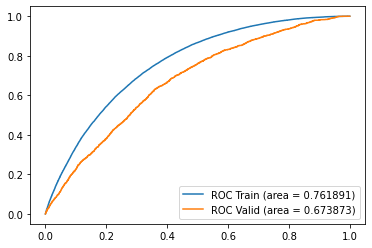

In [18]:
trainer.plot_roc()

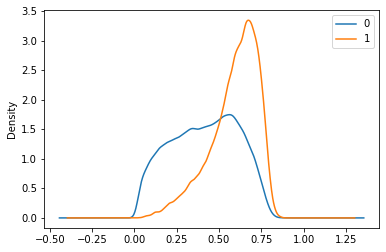

In [19]:
trainer.plot_train_distr()

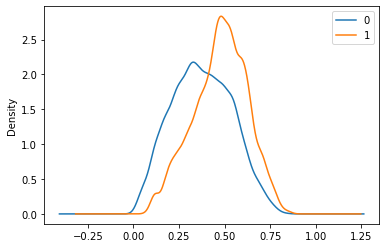

In [20]:
trainer.plot_valid_distr()

In [21]:
trainer.find_threshold()

(0.7000000000000003, 0.6702040816326531)

In [22]:
trainer.print_scores(min_threshold=0.5)

Th: 0.500 Score: 0.574 (11520)
Th: 0.525 Score: 0.583 (9684)
Th: 0.550 Score: 0.595 (7745)
Th: 0.575 Score: 0.621 (6221)
Th: 0.600 Score: 0.628 (4768)
Th: 0.625 Score: 0.637 (3505)
Th: 0.650 Score: 0.631 (2492)
Th: 0.675 Score: 0.649 (1843)
Th: 0.700 Score: 0.670 (1225)
Th: 0.725 Score: 0.686 (741)
Th: 0.750 Score: 0.732 (448)
Th: 0.775 Score: 0.731 (186)
Th: 0.800 Score: 0.763 (76)
Th: 0.825 Score: 0.821 (28)
Th: 0.850 Score: 1.000 (4)


## Save model

In [23]:
save_obj(WEIGHTS_PATH + '/net3.pickle', trainer.model)

In [59]:
trainer.model(train_dataset[0][0].unsqueeze(0).float())[0].item()

float